<a href="https://colab.research.google.com/github/pawan-cpu/AI-enabled-Generative-Quizzing/blob/main/Chapter_7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Clustering

## 7.2 How clustering works?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
#customers_df = pd.read_csv( "customers.csv" )
customers_df=pd.read_csv("Income Data.csv")

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [ ]:
customers_df.head( 5 )

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

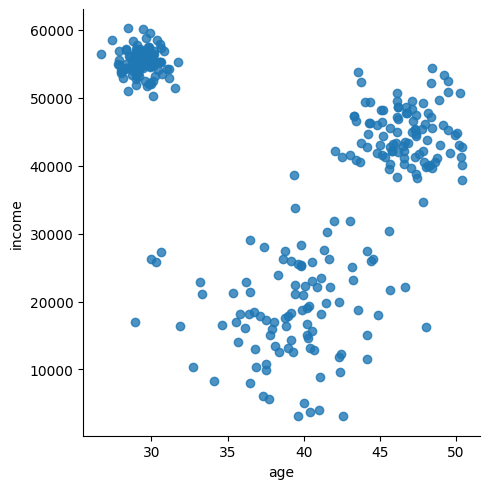

In [ ]:
sn.lmplot(x ='age', y ='income', data = customers_df, fit_reg = False);

## 7.3 K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(n_clusters=3)

In [ ]:
customers_df["clusterid"] = clusters.labels_

In [ ]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


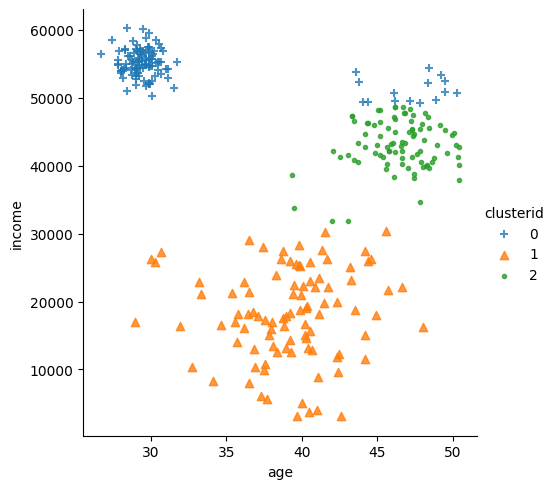

In [ ]:
markers = ['+','^','.']
sn.lmplot(x ='age', y ='income', data = customers_df, fit_reg = False, hue = "clusterid", markers = markers);



### 7.3.1 Plotting the customers with their segments

In [ ]:
markers = ['+','^','.']

sn.lmplot( "age", "income",
          data=customers_df,
          hue = "clusterid",
          fit_reg=False,
          markers = markers,
          size = 4 );

TypeError: lmplot() got multiple values for argument 'data'

### 7.3.2 Normalizing the features

normalised x=value-mean/s.d

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(
    customers_df[["age", "income"]] )

scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [ ]:
from sklearn.cluster import KMeans

clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

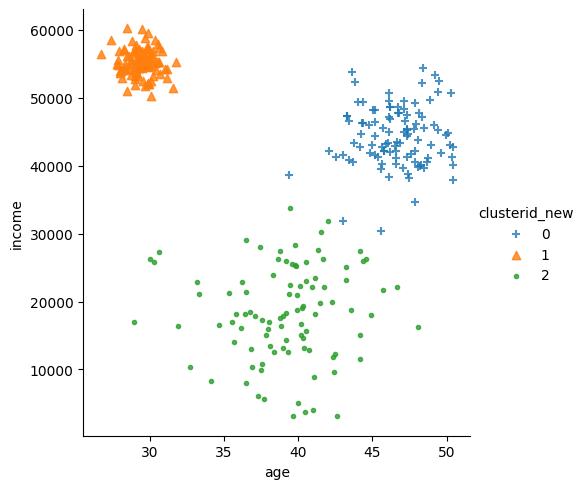

In [ ]:
markers = ['+','^','.']
sn.lmplot(x ='age', y ='income', data = customers_df, fit_reg = False, hue = "clusterid_new", markers = markers);

In [ ]:
markers = ['+','^','.']

sn.lmplot( "age", "income",
          data=customers_df,
          hue = "clusterid_new",
          fit_reg=False,
          markers = markers)

TypeError: lmplot() got multiple values for argument 'data'

In [ ]:
markers = ['+','^','.']

sn.lmplot( "age", "income",
          data=customers_df,
          hue = "clusterid_new",
          fit_reg=False,
          markers = markers,
          size = 4 );
#plt.title( "Fig 3: Customer segments created after normalization");

TypeError: lmplot() got multiple values for argument 'data'

In [ ]:
clusters.cluster_centers_

array([[5.46756522e+04, 3.17004348e+01],
       [1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01]])

### 7.3.3 Cluster Centers and Interpreting the Clusters

In [ ]:
customers_df.groupby( 'clusterid' )['age',
                            'income'].agg( ["mean",
                                            'std'] ).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  31.700435  6.122122  54675.652174  2362.224320
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  46.419101  2.289620  43053.932584  3613.769632

## 7.4 Creating Product Segments

### 7.4.1 Beer Dataset

In [ ]:
beer_df = pd.read_csv( 'beer.csv' )

In [ ]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

### 7.4.2 How many clusters exist?

#### 7.4.2.1 Using Dendrogram

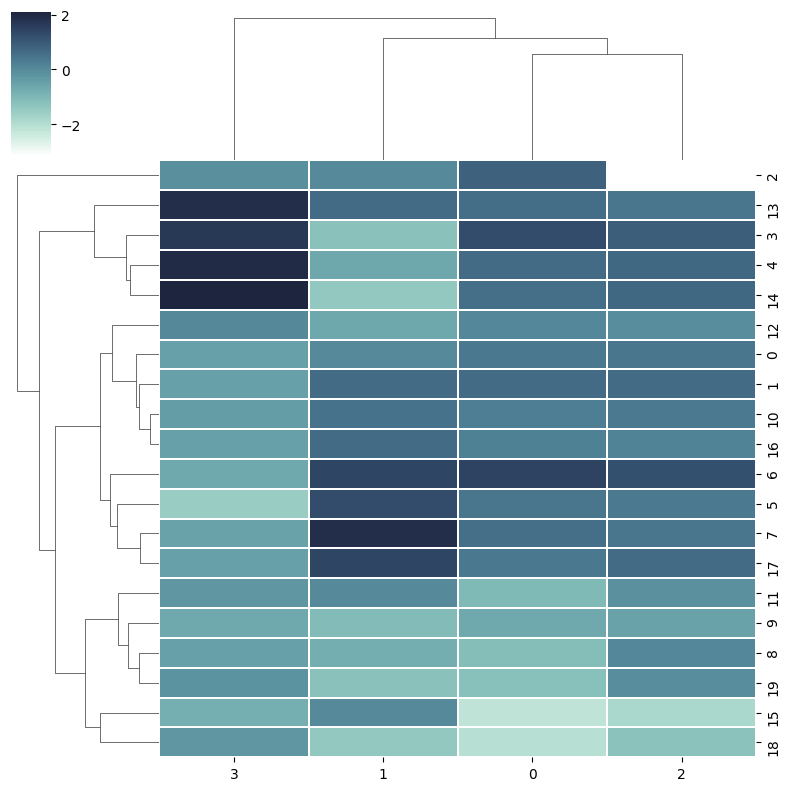

In [ ]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [ ]:
beer_df.ix[[10, 16]]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
beer_df.ix[[2,18]]

AttributeError: 'DataFrame' object has no attribute 'ix'

### 7.4.2.2 Finding Optimal Number of Clusters using Elbow Method

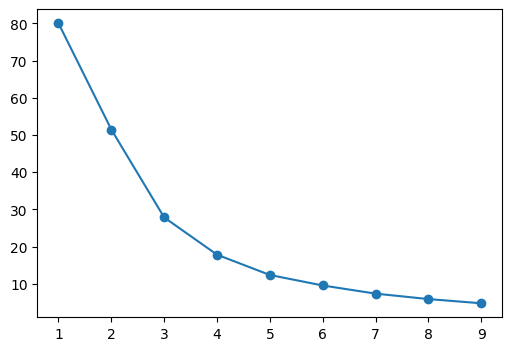

In [ ]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

### 7.4.2.3 Normalizing Features

#### Rescaling the dataset

In [ ]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

### 7.4.3 Creating Clusters

In [ ]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

### 7.4.4 Interpreting the Clusters

#### Cluster 0

In [ ]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,h_clusterid,clusterid
0,Budweiser,144,15,4.7,0.43,1,0
1,Schlitz,151,19,4.9,0.43,1,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0
10,Coors,140,18,4.6,0.44,1,0
16,Hamms,139,19,4.4,0.43,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,1,0


#### Cluster 1

In [ ]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,h_clusterid,clusterid
2,Lowenbrau,157,15,0.9,0.48,0,1
8,Miller_Lite,99,10,4.3,0.43,0,1
9,Budweiser_Light,113,8,3.7,0.40,0,1
11,Coors_Light,102,15,4.1,0.46,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1
19,Schlitz_Light,97,7,4.2,0.47,0,1


#### Cluster 2

In [ ]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,h_clusterid,clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


## 7.5 Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [ ]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [ ]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,h_clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [ ]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2
